#### **Connect drive with colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Change Path**

In [ ]:
%cd '/content/drive/MyDrive/Sentiment Analysis'

/content/drive/MyDrive/Sentiment Analysis


#### **Read Label**

In [ ]:
import pandas as pd
import glob
import os
# Replace 'label.csv' with the actual path to your CSV file
csv_file_path = '/content/drive/MyDrive/Sentiment Analysis/label.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
directory_path = '/content/drive/MyDrive/Sentiment Analysis/Text/'

# Get a list of all file names in the directory
file_names = glob.glob(os.path.join(directory_path, "*.annotprocessed"))

# Extract video IDs from file names
file_ids = [os.path.splitext(os.path.basename(file_name))[0] for file_name in file_names]

# Filter the DataFrame to get rows with video IDs present in the directory
filtered_df = df[df['video_id'].isin(file_ids)]
filtered_df = filtered_df[filtered_df['annotation'] != 'Neutral']
# Print the filtered DataFrame
print(filtered_df[['video_id', 'annotation']])


         video_id annotation
13    0h-zjBukYpk   Positive
14    0h-zjBukYpk   Positive
15    0h-zjBukYpk   Positive
16    0h-zjBukYpk   Positive
17    0h-zjBukYpk   Positive
18    0h-zjBukYpk   Positive
19    0h-zjBukYpk   Negative
20    0h-zjBukYpk   Negative
21    0h-zjBukYpk   Negative
22    0h-zjBukYpk   Positive
23    0h-zjBukYpk   Negative
24    0h-zjBukYpk   Positive
25    0h-zjBukYpk   Negative
26    0h-zjBukYpk   Negative
27    0h-zjBukYpk   Positive
28    0h-zjBukYpk   Positive
29    0h-zjBukYpk   Negative
30    0h-zjBukYpk   Positive
31    0h-zjBukYpk   Negative
33    0h-zjBukYpk   Positive
34    0h-zjBukYpk   Positive
35    0h-zjBukYpk   Positive
36    0h-zjBukYpk   Negative
37    0h-zjBukYpk   Negative
1360  _dI--eQ6qVU   Positive
1361  _dI--eQ6qVU   Positive
1362  _dI--eQ6qVU   Negative
1363  _dI--eQ6qVU   Negative
1364  _dI--eQ6qVU   Positive
1365  _dI--eQ6qVU   Positive
1366  _dI--eQ6qVU   Positive
1368  _dI--eQ6qVU   Positive
1369  _dI--eQ6qVU   Positive
1370  _dI--eQ6

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Convert labels to numerical data
label_encoder = LabelEncoder()
filtered_df['label_encoded'] = label_encoder.fit_transform(filtered_df['annotation'])
#neutral=1, positive=2, negative=0
labeled_data = np.array(filtered_df['label_encoded'])
labeled_data.shape

(51,)

####**Read text files**

In [ ]:
# Filter the DataFrame to get rows where annotation is not 'Neutral'
filtered_text_df = filtered_df[filtered_df['annotation'] != 'Neutral']

# Read the 'text' column from the filtered DataFrame
text_data = filtered_text_df['text'].tolist()

# Print the text data
for text in text_data:
    print(text)


I MEAN THAT WAS IMPRESSIVE
I LIKED THAT SCENE WHERE HE HAD A SWORDS IN THERE AND THERES BUNCH OF PEOPLE THAT ARE GONNA SHOOT HIM BOOM BOOM BOOM BOOM TAKE HIM DOWN TAKE HIM DOWN BAM BAM BAM BAM BAM TAKE THAT WITH MY MAGICAL SWORDS
OK BUT THE TWO BIG CHARACTER APPEARANCES IN THIS MOVIE ARE EASILY DEADPOOL AND GAMBIT
ACTUALLY I LIKED HIM A LOT
AND I THOUGHT HE MADE A GOOD ACTOR FOR THE DEAD POOR CHARACTER
NOW HES SEEN AT THE BEGINNING THAT REALLY SOLD ME
NOW THE TITLE OF THE MOVIE BASICALLY SAYS IT ALL
MY REASON IM A COMIC BOOK FAN
NOW IM NOT EVEN GONNA SUGAR COAT THIS THIS MOVIE FRUSTRATED ME TO SUCH AN EXTREME EXTENT THAT I WAS LOUDLY EXCLAIMING WHY AT THE END OF THE FILM
THAT HUH BEFORE WE GO ON WITH THAT I MUST SAY THAT THIS HAD A SURPRISINGLY DECENT CAST
THAT LIKE TO SEE COMIC BOOK CHARACTERS TREATED RESPONSIBLY
NOW HUGH JACKMAN WAS ALWAYS THE BEST CHOICE TO PLAY WOLVERINE I WILL ADMIT THAT
STRANGE SINCE ONE OF MY BIGGEST GRAPES WITH THE XMAN SERIES WAS AND ALWAYS IS THE XXX
YOU KNOW

In [ ]:
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (only required for the first run)
nltk.download('punkt')
nltk.download('stopwords')

# Define the folder path containing .annotprocessed files
folder_path = '/content/drive/MyDrive/Sentiment Analysis/Text/'

# Initialize a list to store preprocessed text data
preprocessed_text_data = []

# Read the 'text' column from the filtered DataFrame
filtered_text_df = filtered_df[filtered_df['annotation'] != 'Neutral']
text_data = filtered_text_df['text'].tolist()

# Iterate through .annotprocessed files
for text in text_data:
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove punctuation and special characters
    tokens = [token for token in tokens if token.isalnum()]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    preprocessed_text_data.append(tokens)

print("Preprocessed Text Data:", preprocessed_text_data)


Preprocessed Text Data: [['mean', 'impressive'], ['liked', 'scene', 'swords', 'theres', 'bunch', 'people', 'gon', 'na', 'shoot', 'boom', 'boom', 'boom', 'boom', 'take', 'take', 'bam', 'bam', 'bam', 'bam', 'bam', 'take', 'magical', 'swords'], ['ok', 'two', 'big', 'character', 'appearances', 'movie', 'easily', 'deadpool', 'gambit'], ['actually', 'liked', 'lot'], ['thought', 'made', 'good', 'actor', 'dead', 'poor', 'character'], ['hes', 'seen', 'beginning', 'really', 'sold'], ['title', 'movie', 'basically', 'says'], ['reason', 'im', 'comic', 'book', 'fan'], ['im', 'even', 'gon', 'na', 'sugar', 'coat', 'movie', 'frustrated', 'extreme', 'extent', 'loudly', 'exclaiming', 'end', 'film'], ['huh', 'go', 'must', 'say', 'surprisingly', 'decent', 'cast'], ['like', 'see', 'comic', 'book', 'characters', 'treated', 'responsibly'], ['hugh', 'jackman', 'always', 'best', 'choice', 'play', 'wolverine', 'admit'], ['strange', 'since', 'one', 'biggest', 'grapes', 'xman', 'series', 'always', 'xxx'], ['know',

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### **Read Audio Files**

In [ ]:
import os
import librosa
import numpy as np

# Define the folder path containing audio files
audio_folder = "/content/drive/MyDrive/Sentiment Analysis/Audio/"

# Define parameters for MFCC extraction
sr = 22050  # Sampling rate
n_mfcc = 13  # Number of MFCC coefficients
n_frames = 100  # Number of frames

# Initialize a list to store extracted MFCC features
mfcc_features_list = []

# Get video_id and clip_id from filtered_df
video_ids = filtered_df['video_id']
clip_ids = filtered_df['clip_id']

# Iterate through video_id and clip_id pairs
for video_id, clip_id in zip(video_ids, clip_ids):
    audio_path = os.path.join(audio_folder, f"{video_id}_{clip_id}.wav")
    y, _ = librosa.load(audio_path, sr=sr)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Pad or truncate MFCC features to a fixed number of frames
    if mfccs.shape[1] < n_frames:
        mfccs_padded = np.pad(mfccs, ((0, 0), (0, n_frames - mfccs.shape[1])), mode='constant')
        mfcc_features_list.append(mfccs_padded)
    elif mfccs.shape[1] >= n_frames:
        mfcc_features_list.append(mfccs[:, :n_frames])

# Convert the list of MFCC features to a numpy array
mfcc_features_array = np.array(mfcc_features_list)

print("MFCC Features Shape:", mfcc_features_array.shape)
preprocessed_audio_data = mfcc_features_array

print("Preprocessed Audio Data:")
print(preprocessed_audio_data.shape)


MFCC Features Shape: (51, 13, 100)
Preprocessed Audio Data:
(51, 13, 100)


#### **Read Video Files**

In [ ]:
import os
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

# Function to find all .mp4 files in a directory
def find_mp4_files(directory_path, video_ids, clip_ids):
    mp4_files = []
    for video_id, clip_id in zip(video_ids, clip_ids):
        file_path = os.path.join(directory_path, f"{video_id}_{clip_id}.mp4")
        if os.path.exists(file_path):
            mp4_files.append(file_path)
    return mp4_files

# Function to extract video features from a list of video files
def extract_video_features(video_files, target_size=(224, 224), n_frames=100):
    video_features = []
    vgg16 = VGG16(weights='imagenet', include_top=False)
    vgg16 = Model(inputs=vgg16.input, outputs=vgg16.layers[-1].output)  # Remove the top classification layer

    for video_file in video_files:
        frames = []
        cap = cv2.VideoCapture(video_file)
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            frame = cv2.resize(frame, target_size)
            frame = preprocess_input(frame)  # Preprocess the frame for VGG16
            frames.append(frame)

            if len(frames) >= n_frames:
                break

        cap.release()

        # Pad or truncate frames to a fixed number of frames (n_frames)
        if len(frames) < n_frames:
            frames_padded = np.pad(frames, ((0, n_frames - len(frames)), (0, 0), (0, 0), (0, 0)), mode='constant')
            video_features.append(frames_padded)
        elif len(frames) >= n_frames:
            video_features.append(frames[:n_frames])

    return np.array(video_features)

# Replace '/content/drive/MyDrive/Sentiment Analysis/Video/' with the actual path to the directory containing .mp4 files
video_directory = '/content/drive/MyDrive/Sentiment Analysis/Video/'

# Get video_id and clip_id from filtered_df
video_ids = filtered_df['video_id']
clip_ids = filtered_df['clip_id']

# Find .mp4 files based on video_id and clip_id
video_files = find_mp4_files(video_directory, video_ids, clip_ids)

# Preprocess video data
preprocessed_video_data = extract_video_features(video_files)

print("Preprocessed Video Data:")
print(preprocessed_video_data.shape)


58889256/58889256 [==============================] - 0s 0us/step
Preprocessed Video Data:
(51, 100, 224, 224, 3)


In [ ]:
import numpy as np
preprocessed_text_data = np.array(preprocessed_text_data)
preprocessed_audio_data = np.array(preprocessed_audio_data)
preprocessed_video_data = np.array(preprocessed_video_data)
# Convert labels to a numpy array (if it's not already)
labels = np.array(filtered_df['annotation'])
training_labels=labels

print("Preprocessed Audio Data Shape:", preprocessed_audio_data.shape)
print("Preprocessed Text Data Shape:", preprocessed_text_data.shape)
print("Preprocessed Video Data Shape:", preprocessed_video_data.shape)
print("Labeled Data Shape:", labels.shape)

<ipython-input-9-ce7c65dd90af>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  preprocessed_text_data = np.array(preprocessed_text_data)


Preprocessed Audio Data Shape: (51, 13, 100)
Preprocessed Text Data Shape: (51,)
Preprocessed Video Data Shape: (51, 100, 224, 224, 3)
Labeled Data Shape: (51,)


#### **RNN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert text data to sequences and pad
max_sequence_length = preprocessed_text_data.shape[0]
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(preprocessed_text_data)
sequences = tokenizer.texts_to_sequences(preprocessed_text_data)
padded_text_data = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Embedding, Flatten, concatenate, Reshape

audio_input_shape = (13, 100)
text_input_shape = (max_sequence_length,)  # You need to define the appropriate shape based on your text preprocessing
video_input_shape = (100, 224, 224, 3)
# Number of classes for prediction
num_classes = 1
# Define vocabulary size based on your text preprocessing
vocab_size = 10000
# Create the RNN model
def create_rnn_model():
    # Audio input
    audio_input = Input(shape=audio_input_shape, name='audio_input')
    audio_lstm = SimpleRNN(64)(audio_input)

    # Text input (you might need to preprocess the text data before feeding it into the model)
    text_input = Input(shape=text_input_shape, name='text_input')
    text_embedding = Embedding(input_dim=vocab_size, output_dim=64)(text_input)
    text_lstm = SimpleRNN(64)(text_embedding)

    # Video input
    video_input = Input(shape=video_input_shape, name='video_input')
    video_reshaped = Reshape((100, -1))(video_input)  # Reshape video data to (sequence_length, input_dim)
    video_lstm = SimpleRNN(64)(video_reshaped)

    # Combine the modalities
    merged = concatenate([audio_lstm, text_lstm, video_lstm])

    # Dense layers for prediction
    dense1 = Dense(128, activation='relu')(merged)
    output = Dense(num_classes, activation='softmax')(dense1)

    model = Model(inputs=[audio_input, text_input, video_input], outputs=output)
    return model

# Instantiate the model
model = create_rnn_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 51)]         0           []                               
                                                                                                  
 video_input (InputLayer)       [(None, 100, 224, 2  0           []                               
                                24, 3)]                                                           
                                                                                                  
 audio_input (InputLayer)       [(None, 13, 100)]    0           []                               
                                                                                                  
 embedding (Embedding)          (None, 51, 64)       640000      ['text_input[0][0]']       

In [ ]:
# Train the model
history=model.fit([preprocessed_audio_data, padded_text_data, preprocessed_video_data], labeled_data,batch_size=2, epochs=10)




Epoch 1/10
26/26 [==============================] - 132s 5s/step - loss: 0.7242 - accuracy: 0.7255
Epoch 2/10
26/26 [==============================] - 116s 4s/step - loss: 0.4189 - accuracy: 0.7255
Epoch 3/10
26/26 [==============================] - 114s 4s/step - loss: 0.3250 - accuracy: 0.7255
Epoch 4/10
26/26 [==============================] - 113s 4s/step - loss: 0.2198 - accuracy: 0.7255
Epoch 5/10
26/26 [==============================] - 109s 4s/step - loss: 0.1257 - accuracy: 0.7255
Epoch 6/10
26/26 [==============================] - 108s 4s/step - loss: 0.0948 - accuracy: 0.7255
Epoch 7/10
26/26 [==============================] - 102s 4s/step - loss: 0.0431 - accuracy: 0.7255
Epoch 8/10
26/26 [==============================] - 100s 4s/step - loss: 0.0294 - accuracy: 0.7255
Epoch 9/10
26/26 [==============================] - 98s 4s/step - loss: 0.0114 - accuracy: 0.7255
Epoch 10/10
26/26 [==============================] - 110s 4s/step - loss: 0.0069 - accuracy: 0.7255


In [ ]:
from tensorflow.keras.models import save_model

# After training your model
model.save('model_RNN.h5')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model_RNN.h5')

#### **Model Evaluation**

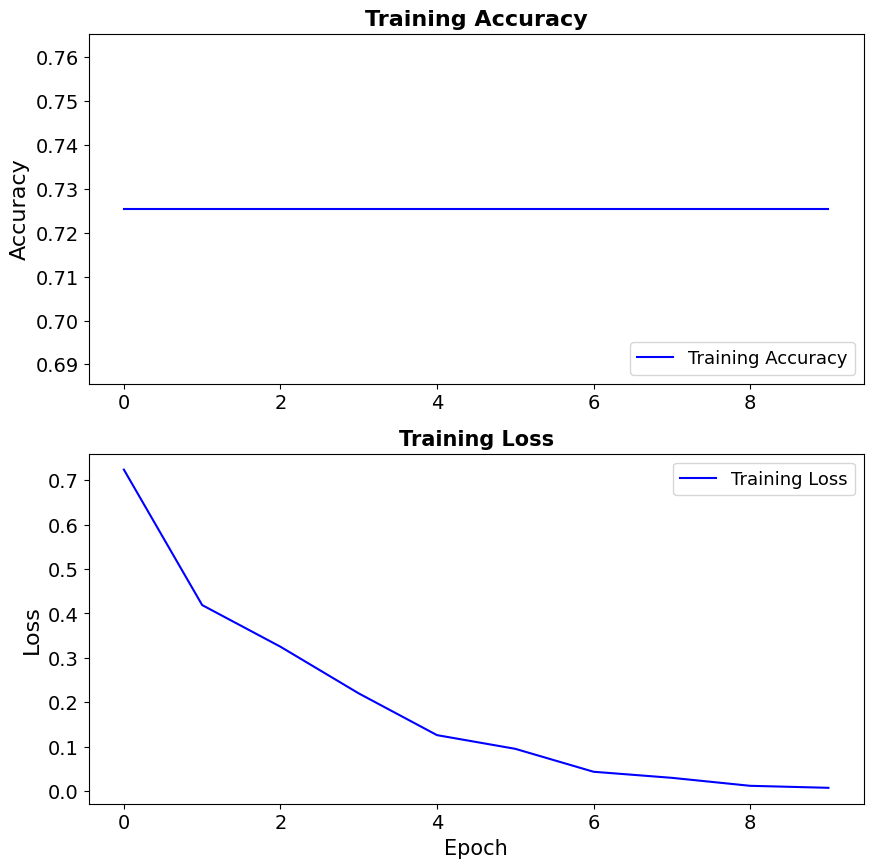

In [ ]:
#title
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='blue')


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=4, fontsize=13)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Training Accuracy', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='blue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=1, fontsize=13)
plt.ylabel('Loss', fontsize=16)
plt.title('Training Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15)
plt.show()

In [ ]:
# Evaluate the Model

loaded_model.evaluate([preprocessed_audio_data, padded_text_data, preprocessed_video_data], labeled_data,batch_size=2)


26/26 [==============================] - 28s 1s/step - loss: 0.0067 - accuracy: 0.7255


[0.006745769642293453, 0.7254902124404907]

In [ ]:
# Model to make predictions on new data

predictions = loaded_model.predict([preprocessed_audio_data, padded_text_data, preprocessed_video_data],batch_size=2)


26/26 [==============================] - 28s 1s/step


#### **Test Data**

**Read text file**

In [ ]:
def read_specific_line(file_path, line_number, encoding='utf-8'):
    try:
        with open(file_path, 'r', encoding=encoding) as file:
            for _ in range(line_number - 1):  # Skip the first (line_number - 1) lines
                file.readline()

            specific_line = file.readline()

        return specific_line.strip()  # strip() to remove the newline character at the end of the line
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error occurred while reading the file: {e}")

# Replace 'your_file_path.txt' with the actual path to your .textonly file
file_path = '/content/drive/MyDrive/Sentiment Analysis/Text/_dI--eQ6qVU.annotprocessed'
line_number = 5 # @param {type:"slider", min:1, max:100, step:1}
read_line = read_specific_line(file_path, line_number)

# Print the n-th line of the file
if read_line:
    print(read_line)


5_DELIM_AND I WOULD TELL YOU RIGHT NOW IT WAS HILARIOUS


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (only required for the first run)
nltk.download('punkt')
nltk.download('stopwords')

# Sample text data from CMU-MOSEI (replace this with your actual data)
testtext_data = [read_line]

# Text preprocessing steps
def preprocess_text(testtext_data):
    # Tokenization
    tokenized_data = [word_tokenize(text.lower()) for text in testtext_data]

    # Remove punctuation and special characters
    tokenized_data = [[token for token in tokens if token.isalnum()] for tokens in tokenized_data]

    # Remove stop words (optional)
    stop_words = set(stopwords.words('english'))
    tokenized_data = [[token for token in tokens if token not in stop_words] for tokens in tokenized_data]

    return tokenized_data

# Preprocess text data
preprocessed_text_data_test = preprocess_text(testtext_data)
print("Preprocessed Text Data:")
print(preprocessed_text_data_test)

Preprocessed Text Data:
[['would', 'tell', 'right', 'hilarious']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Read Audio File**

In [ ]:
import librosa
import numpy as np

# Read one audio file from CMU-MOSEI (you'll need to load the actual data from the dataset)
audio_file = [
    "/content/drive/MyDrive/Sentiment Analysis/Audio/_dI--eQ6qVU_5.wav"
]

# Audio feature extraction
def extract_audio_features(audio_file, sr=22050, n_mfcc=13, n_frames=100):
    audio_features = []
    for audio_file in audio_file:
        # Load audio file using Librosa
        y, _ = librosa.load(audio_file, sr=sr)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # Pad or truncate MFCC features to a fixed number of frames (n_frames)
        if mfccs.shape[1] < n_frames:
            mfccs_padded = np.pad(mfccs, ((0, 0), (0, n_frames - mfccs.shape[1])), mode='constant')
            audio_features.append(mfccs_padded)
        elif mfccs.shape[1] >= n_frames:
            audio_features.append(mfccs[:, :n_frames])

    return np.array(audio_features)

# Preprocess audio data
preprocess_audio_data_test = extract_audio_features(audio_file)

**Visualize Audio Data**

In [ ]:
from IPython.display import Audio, display
s = 1

if s == 1:
  display(Audio(audio_file[0], autoplay=False))

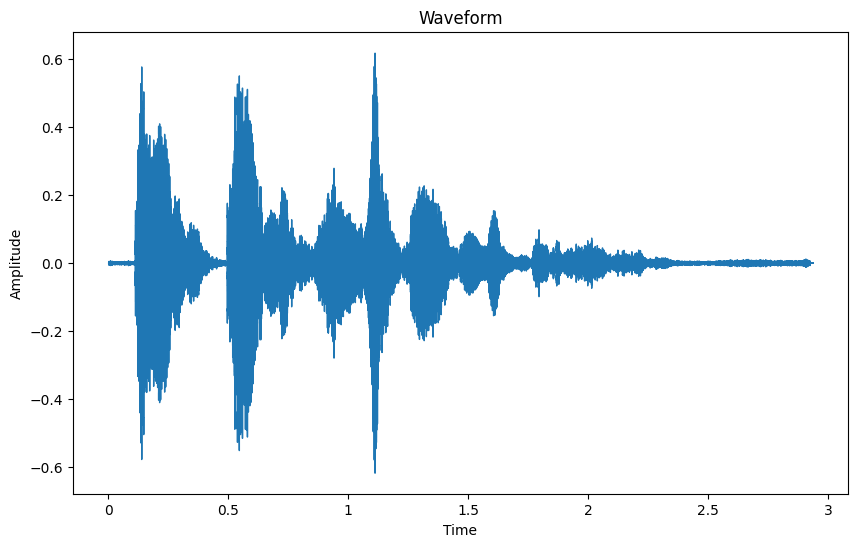

  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)



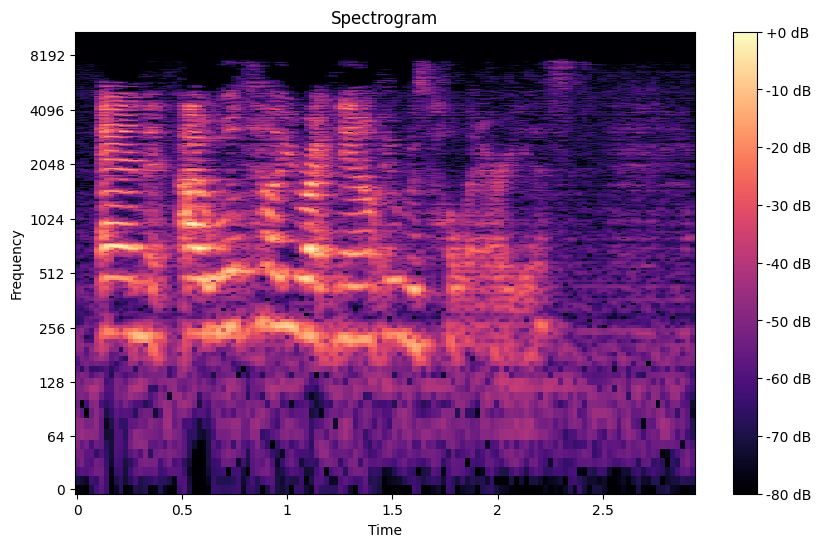

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file using librosa
y, sr = librosa.load(audio_file[0])

# Plot the waveform
plt.figure(figsize=(10, 6))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Plot the spectrogram
plt.figure(figsize=(10, 6))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


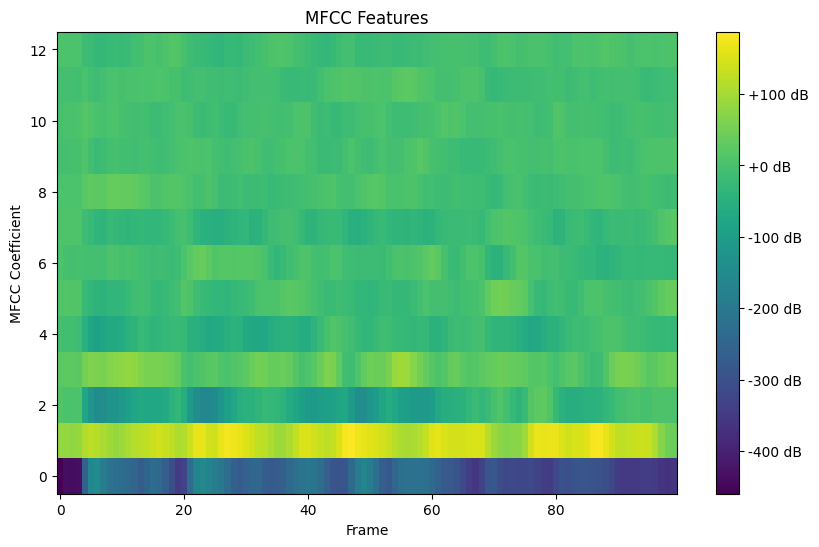

In [ ]:
import matplotlib.pyplot as plt

# Select a single sample from the preprocessed audio data (adjust the index as needed)
sample_index = 0
mfcc_sample = preprocess_audio_data_test[sample_index]

# Plot the MFCC features
plt.figure(figsize=(10, 6))
plt.imshow(mfcc_sample, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.title(f'MFCC Features')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.show()


**Read video file**

In [ ]:
import cv2
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

# read one video file from CMU-MOSEI (you'll need to load the actual data from the dataset)
video_file = [
    "/content/drive/MyDrive/Sentiment Analysis/Video/_dI--eQ6qVU_4.mp4"
]

# Video feature extraction using VGG16
def extract_video_features(video_file, target_size=(224, 224), n_frames=100):
    video_features = []
    vgg16 = VGG16(weights='imagenet', include_top=False)
    vgg16 = Model(inputs=vgg16.input, outputs=vgg16.layers[-1].output)  # Remove the top classification layer

    for video_file in video_file:
        frames = []
        cap = cv2.VideoCapture(video_file)
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            frame = cv2.resize(frame, target_size)
            frame = preprocess_input(frame)  # Preprocess the frame for VGG16
            frames.append(frame)

            if len(frames) >= n_frames:
                break

        cap.release()

        # Pad or truncate frames to a fixed number of frames (n_frames)
        if len(frames) < n_frames:
            frames_padded = np.pad(frames, ((0, n_frames - len(frames)), (0, 0), (0, 0), (0, 0)), mode='constant')
            video_features.append(frames_padded)
        elif len(frames) >= n_frames:
            video_features.append(frames[:n_frames])

    return np.array(video_features)

# Preprocess video data
preprocess_video_data_test = extract_video_features(video_file)

**Visualize Video Data**

In [ ]:
import moviepy.editor
moviepy.editor.ipython_display(video_file[0])

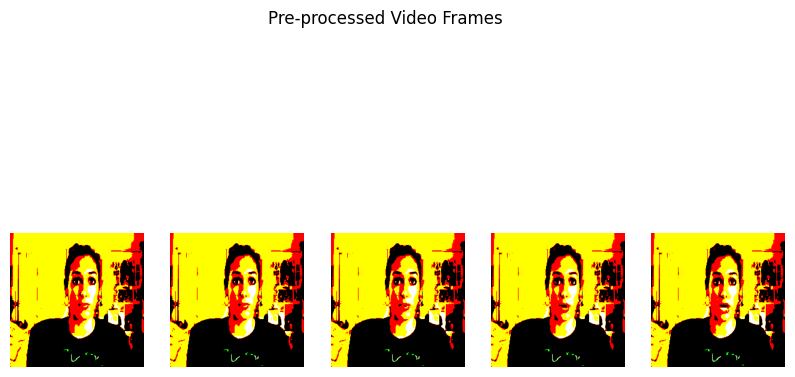

In [ ]:
import matplotlib.pyplot as plt

# Select a single sample from the preprocessed video data (adjust the index as needed)
sample_index = 0
video_sample = preprocess_video_data_test[sample_index]

# Plot a few frames from the video sample
plt.figure(figsize=(10, 6))
for i in range(min(5, video_sample.shape[0])):
    plt.subplot(1, 5, i + 1)
    plt.imshow(video_sample[i])
    plt.axis('off')
plt.suptitle(f'Pre-processed Video Frames')
plt.show()


In [ ]:
preprocessed_text_data_test = np.array(preprocessed_text_data_test)
preprocessed_audio_data_test = np.array(preprocess_audio_data_test)
preprocessed_video_data_test = np.array(preprocess_video_data_test)

print("Preprocessed Text Data for testing:")
print(preprocessed_text_data_test.shape)

print("Preprocessed Audio Data for testing:")
print(preprocess_audio_data_test.shape)

print("Preprocessed Video Data for Testing:")
print(preprocess_video_data_test.shape)

Preprocessed Text Data for testing:
(1, 7)
Preprocessed Audio Data for testing:
(1, 13, 100)
Preprocessed Video Data for Testing:
(1, 100, 224, 224, 3)


In [ ]:
# Get the predicted label
predict_label = np.argmax(predictions[4])
review = ['Negative' , 'Positive']
# Print predicted label
print("Predicted Label:", review[predict_label])

Predicted Label: Negative


#### **Metrics Evaluation**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

# Example predicted labels and true labels
predicted_labels = np.round(predictions)
true_labels = labeled_data

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(np.array(predicted_labels) - np.array(true_labels)))

print(f"Mean Absolute Error: {mae:.4f}")



Mean Absolute Error: 0.2745


In [ ]:
# Evaluate the Model

loaded_model.evaluate([preprocessed_audio_data, padded_text_data, preprocessed_video_data], labeled_data,batch_size=2)


26/26 [==============================] - 28s 1s/step - loss: 0.0067 - accuracy: 0.7255


[0.006745769642293453, 0.7254902124404907]